In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [2]:
data_path = '../data/stage_1_train_images/'
label_file = '../label/stage_1_train_labels.csv'

In [3]:
df_label = pd.read_csv(label_file, sep=',', header=0, names=None, index_col=None)
print(df_label.head(10))

                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
6  00569f44-917d-4c86-a842-81832af98c30    NaN    NaN    NaN     NaN       0
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970    NaN    NaN    NaN     NaN       0
8  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1


In [4]:
df_positive = df_label[df_label['Target'] == 1].copy()
print(df_positive.head(3))

                              patientId      x      y  width  height  Target
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
8  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1


In [15]:
patientId = df_positive.iloc[0]['patientId']
x = df_positive.iloc[0]['x']
y = df_positive.iloc[0]['y']
width = df_positive.iloc[0]['width']
height = df_positive.iloc[0]['height']
Target = 1

In [28]:
my_file = os.path.join(data_path, patientId) + '.dcm'
print(my_file)
reader = sitk.ImageFileReader()
reader.SetFileName(my_file)
reader.LoadPrivateTagsOn();
reader.ReadImageInformation();

size = reader.GetSize()
print( "Image size:", size[0], size[1], size[2])

image = reader.Execute()
print(image.GetSize())

../data/stage_1_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm
Image size: 1024 1024 1
(1024, 1024, 1)


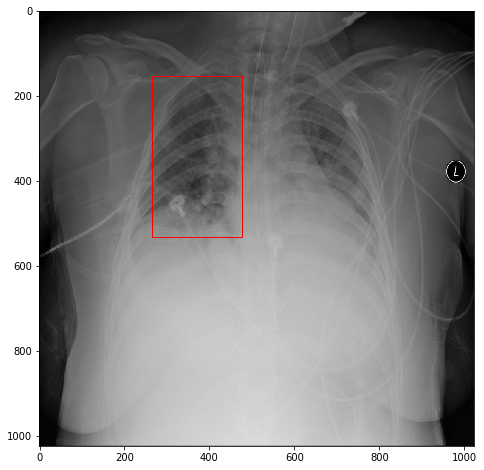

In [39]:
npimage = sitk.GetArrayFromImage(image)
npimage_2d = npimage[0]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, aspect='equal')
plt.imshow(npimage_2d, cmap='gray')
import matplotlib.patches as patches
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [42]:
import cv2
cv2.imwrite('test.png', npimage_2d)

True

In [44]:
import Augmentor
p = Augmentor.Pipeline('./')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.sample(5)


Processing test.png:  20%|██        | 1/5 [00:00<00:00,  6.28 Samples/s]

Initialised with 1 image(s) found.
Output directory set to ./output.